In [29]:
# import packages
import numpy as np
import os
from matplotlib import pyplot as plt

from SimPEG import maps
from SimPEG.electromagnetics import frequency_domain as fdem
from SimPEG.utils import plot_1d_layer_model

from SimPEG import (
    maps,
    data,
    data_misfit,
    inverse_problem,
    regularization,
    optimization,
    directives,
    inversion,
)

from discretize import TensorMesh

In [30]:
src_z = 0.25  # src is 0.25m above the surface
orientation = "z"  # z-oriented dipole for horizontal co-planar loops
freq = 1e3

# reciever offset in 3D space
coil_separations = [0.05, 0.15, 0.20, 0.25, 0.3]
rx_offsets = np.vstack([np.r_[sep, 0.0, 0.0] for sep in coil_separations])

# create our source list - one source per location
source_list = []

src_loc = np.r_[0.0, 0.0, src_z]

rx_locs = src_loc - rx_offsets

for rx in rx_locs:
    rx_real = fdem.receivers.PointMagneticFluxDensitySecondary(
        locations=rx, orientation=orientation, component="real"
    )
    rx_imag = fdem.receivers.PointMagneticFluxDensitySecondary(
        locations=rx, orientation=orientation, component="imag"
    )

    src = fdem.sources.MagDipole(
        receiver_list=[rx_real, rx_imag],
        location=src_loc,
        orientation=orientation,
        frequency=freq,
    )

source_list.append(src)

# create the survey and problem objects for running the forward simulation
survey = fdem.survey.Survey(source_list)

In [31]:
# Define layer thicknesses (m)
layer_thicknesses = np.array([0.25, 0.5])

# Define layer conductivities (S/m)
layer_conductivities = np.r_[1e-3, 1e-2, 1e-4]

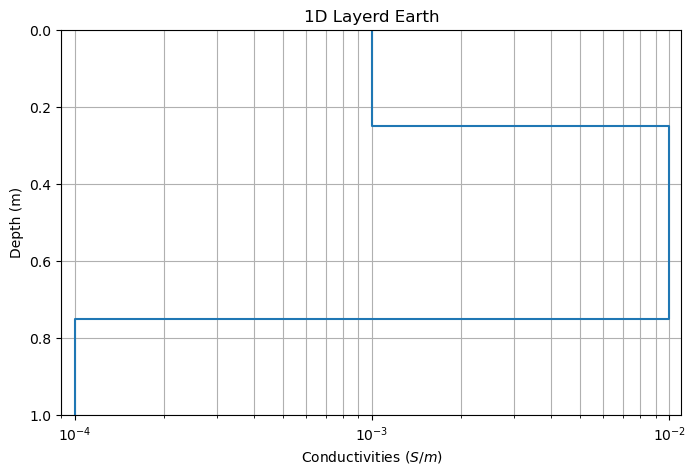

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax = plot_1d_layer_model(layer_thicknesses, layer_conductivities, scale="log", ax=ax)
ax.grid(which="both")
ax.set_xlabel(r"Conductivities ($S/m$)")
ax.set_ylim([1, 0])
ax.set_title("1D Layerd Earth")
plt.show()

In [26]:
# LOG-RESISTIVITY MODEL
log_conductivities_model = np.log(layer_conductivities)

# Define the Mappings
log_conductivities_map = maps.ExpMap(nP=len(layer_thicknesses)+1)

In [27]:
# Define forward simulation

simulation= fdem.Simulation1DLayered(
    survey=survey,
    thicknesses=layer_thicknesses,
    sigmaMap=log_conductivities_map
)

In [33]:
# Predict 1D FDEM Data
dpred= simulation.dpred(log_conductivities_model)

ValueError: dimension mismatch